In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/philip-HP-rp5700-Business-System/CIA_Country_Facts.csv')

In [ ]:
###The summary statistics of the dataset
df2.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [ ]:
###All the data columns in a Series
pd.Series(df2.columns)

0                                Country
1                                 Region
2                             Population
3                         Area (sq. mi.)
4             Pop. Density (per sq. mi.)
5           Coastline (coast/area ratio)
6                          Net migration
7     Infant mortality (per 1000 births)
8                     GDP ($ per capita)
9                           Literacy (%)
10                     Phones (per 1000)
11                            Arable (%)
12                             Crops (%)
13                             Other (%)
14                               Climate
15                             Birthrate
16                             Deathrate
17                           Agriculture
18                              Industry
19                               Service
dtype: object

In [ ]:
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
###Checking for all the info of the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [ ]:
###Checking for the percentage of missing values in the dataset
df_null=df2.isnull().sum()/len(df2)*100

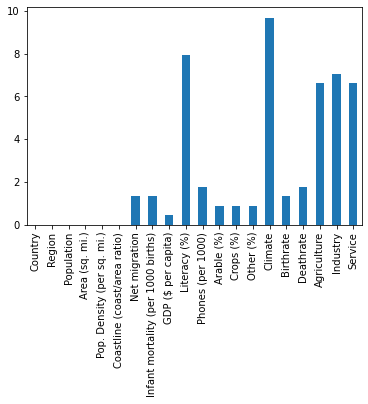

In [ ]:
####A plot of the percentage of missing values per variable
df_null.plot(kind="bar")

In [ ]:
###Checking for missing values in the agriculture feature
df2[df2['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [ ]:
###Replacing the agriculture value that is missing woth 0 since they are islands
df2[df2["Agriculture"].isnull()]=df2[df2["Agriculture"].isnull()].fillna(0)

In [ ]:
###Filling the climate missing values by mean per region
df2["Climate"]=df2["Climate"].fillna(df2.groupby("Region")["Climate"].transform("mean"))

In [ ]:
###Filling in the missing values of the percentages of literacy using the mean of the region
df2['Literacy (%)']=df2['Literacy (%)'].fillna(df2.groupby('Region')['Literacy (%)'].transform('mean'))

In [ ]:
####Dropping the rest of the missing values
df3=df2.dropna()

In [ ]:
df3.shape

(221, 20)

In [ ]:
df3.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


In [ ]:
###Dropping the regions column
df4=df3.drop('Region',axis=1)

In [ ]:
###Dropping the country column for the dataframe since it's a unique identifier
df4=df4.drop("Country",axis=1)

In [ ]:
###Converting the cartegorical variables into numeric dummy variables
df4=pd.get_dummies(df4,drop_first=True)

In [ ]:
###appending back the countries column
df4['Country']=df3['Country']

In [ ]:
df4.head(2)

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,Afghanistan
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,Albania


In [ ]:
###Standardizing the data
from sklearn.preprocessing import StandardScaler

In [ ]:
###Forming an instance of scaler to which to fit and transform the data the data
scaler=StandardScaler()

In [ ]:
###Scaling the features
X_scaled=scaler.fit_transform(df4.drop('Country',axis=1))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
len(df3.columns)

20

In [ ]:
###Carrying out principal componet analysis then projecting it to the original data
pca=PCA()
pca_array=pca.fit_transform(X_scaled)

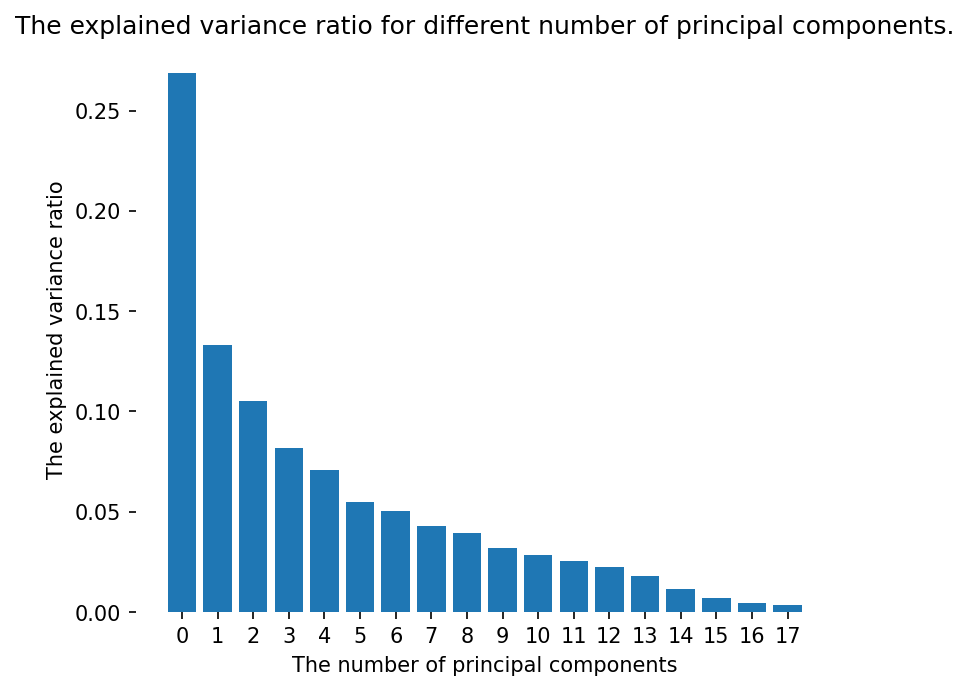

In [ ]:
###Plotting a bar graph to determine the suitable number of principal components where the principal componets stop reducing rapidly
plt.figure(figsize=(6,5),dpi=150)
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
###Defining the axes
ax=plt.gca()
###Turning off the right spine and the top spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(range(pca.n_components_))
plt.xlabel("The number of principal components")
plt.ylabel("The explained variance ratio")
plt.title('The explained variance ratio for different number of principal components.')
###Adding a theme to a matplotlib plot
plt.show()

In [ ]:
###Creating a PCA Dataframe
pca_df=pd.DataFrame({f"pca_feature_{i+1}":pca_array[:,i]for i in range(11)},index=df4.Country)

In [ ]:
pca_df.head(2)

,pca_feature_1,pca_feature_2,pca_feature_3,pca_feature_4,pca_feature_5,pca_feature_6,pca_feature_7,pca_feature_8,pca_feature_9,pca_feature_10,pca_feature_11
Country,,,,,,,,,,,
Afghanistan,4.898651,-2.337352,-1.144703,-2.479290,2.456088,-0.929183,0.604912,1.296627,-2.850865,0.561926,-0.426428
Albania,-0.255274,1.420497,-0.091922,-0.113326,-0.557962,0.137916,-0.391533,-1.297209,0.774505,0.725374,0.114773


In [ ]:
###Fitting the kmeans clustering
from sklearn.cluster import KMeans
cluster_number=range(2,12)
inertia_list=[]
for i in cluster_number:
  kmeans=KMeans(n_clusters=i,random_state=101,max_iter=10000,algorithm='full')
  kmeans.fit(pca_df)
  inertia_list.append(kmeans.inertia_)


Text(0, 0.5, 'Inertia.')

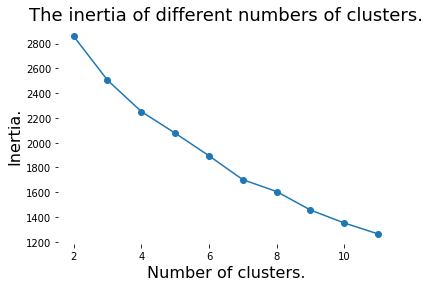

In [ ]:
plt.plot(cluster_number,inertia_list,marker='o')
ax=plt.gca()
###Turning off the right spine and the top spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title('The inertia of different numbers of clusters.',fontsize=18)
plt.xlabel("Number of clusters.",fontsize=16)
plt.ylabel("Inertia.",fontsize=16)

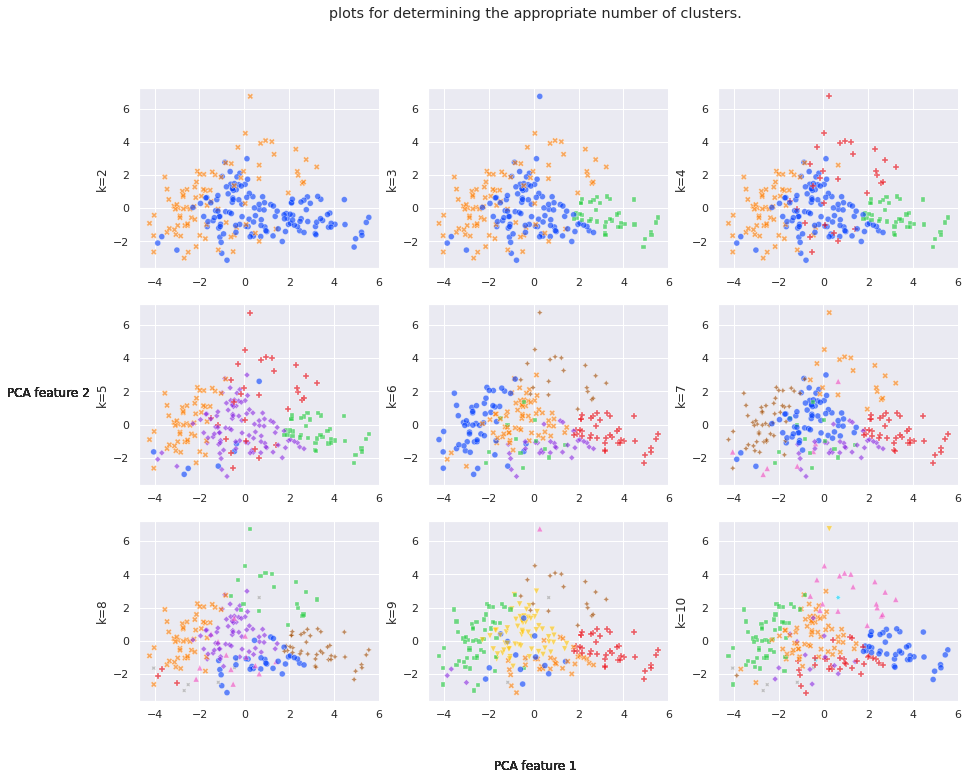

In [ ]:
from pandas.core.common import random_state
###Using the first 2 principal components to find out the number  clusters that are non overlapping since the elbow method is not clear enough
fig,axes=plt.subplots(nrows=3,ncols=3)
for num,ax in zip(cluster_number,axes.ravel()):
  kmeans=KMeans(n_clusters=num,random_state=101,max_iter=10000,algorithm='full')
  kmeans.fit(pca_df)
  pca_df_k_test=pca_df.copy()
  pca_df_k_test[f"cluster(k={num})"]=kmeans.labels_
  k_palette=sns.color_palette("bright")[:len(set(kmeans.labels_))]

  sns.scatterplot(
      x="pca_feature_1",y="pca_feature_2",
      data=pca_df_k_test,
      style=f"cluster(k={num})",
      hue=f"cluster(k={num})",
      ax=ax,
      palette=k_palette,
      legend=False,
      alpha=0.6
  )
  ax.set(xlabel="",ylabel=f"k={num}")
  fig.text(0.5,0.04,"PCA feature 1",ha="center")
  fig.text(0.04,0.5,"PCA feature 2",ha="center")
  fig.suptitle("plots for determining the appropriate number of clusters.")
  sns.set(rc={'figure.figsize':(14.7,11.27)})

In [ ]:
##Kmeans clustering with k=9
kmeans_9=KMeans(n_clusters=9,random_state=101,max_iter=10000,algorithm='full')
kmeans_9.fit(pca_df)
###The cluster labels
pca_df['cluster']=kmeans_9.labels_
###Checking the cluster that Kenta belongs
Kenya_cluster=int(pca_df.query("Country=='Kenya'")["cluster"].values)
###Labeling the cluster where Kenya belongs


In [ ]:
###The cluster that Kenya belongs to
Kenya_cluster


5

In [ ]:
pca_df.head()

,pca_feature_1,pca_feature_2,pca_feature_3,pca_feature_4,pca_feature_5,pca_feature_6,pca_feature_7,pca_feature_8,pca_feature_9,pca_feature_10,pca_feature_11,cluster
Country,,,,,,,,,,,,
Afghanistan,4.898651,-2.337352,-1.144703,-2.479290,2.456088,-0.929183,0.604912,1.296627,-2.850865,0.561926,-0.426428,5
Albania,-0.255274,1.420497,-0.091922,-0.113326,-0.557962,0.137916,-0.391533,-1.297209,0.774505,0.725374,0.114773,6
Algeria,0.733790,-1.701109,0.003134,2.194806,-1.171240,-1.049507,0.883527,0.467834,0.050544,-0.006449,0.112028,8
American Samoa,-0.198271,2.114851,2.548667,1.964628,-1.023862,-0.344431,-1.650373,-0.096304,2.786031,-0.550267,1.201845,6
Andorra,-1.986784,-1.635417,0.770392,-0.642724,0.236762,-1.450747,-1.751832,0.420842,0.769424,1.999627,1.235609,0


In [ ]:
Class_Kenya=pca_df[pca_df["cluster"]==5]

In [ ]:
len(Class_Kenya)

39

In [ ]:
Class_Kenya

,pca_feature_1,pca_feature_2,pca_feature_3,pca_feature_4,pca_feature_5,pca_feature_6,pca_feature_7,pca_feature_8,pca_feature_9,pca_feature_10,pca_feature_11,cluster
Country,,,,,,,,,,,,
Afghanistan,4.898651,-2.337352,-1.144703,-2.479290,2.456088,-0.929183,0.604912,1.296627,-2.850865,0.561926,-0.426428,5
Angola,4.965602,-1.835731,-1.706419,-0.459917,-0.916953,0.836200,1.383877,2.805006,0.156755,-0.933903,0.105828,5
Benin,2.943177,0.302016,-0.076414,-1.047600,0.808401,0.016319,-0.286838,-0.624961,-0.073523,-0.381631,-0.219205,5
Bhutan,3.174059,-1.099127,-0.079328,-0.382551,-0.437041,0.019156,0.309163,0.337933,0.251082,0.126196,-0.064232,5
Burkina Faso,3.816103,-0.288016,-0.312547,-1.178413,0.807673,0.183739,-0.203182,-0.092682,0.100118,-0.555833,-0.177704,5
Burma,2.097980,0.329033,-0.113997,-0.335951,0.542269,0.282931,-1.123788,-1.242775,0.724677,1.171704,0.182940,5
Cambodia,2.110290,0.333108,-0.462713,-0.300778,-0.023184,-0.572050,0.033367,-0.286012,0.317099,0.625568,-0.123556,5
Cameroon,2.765569,-0.083337,-0.046376,-0.509379,0.332047,0.201725,-0.493842,-0.495914,-0.020067,0.307765,0.032451,5
Central African Rep.,4.044823,-0.966847,-0.251620,-1.028137,0.347255,0.696291,-0.844401,0.092602,0.622608,0.668387,0.527978,5


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X_scaled,kmeans_9.labels_)

0.1710861099862594

In [ ]:
###Finding out which 5 countries which have similarities with Kenya
df_same_cluster=pca_df.query("cluster==5")
###Calculating the euclidean distance from the Kenyan data point
Kenya_x,Kenya_y=df_same_cluster.query("Country=='Kenya'")[["pca_feature_1",	"pca_feature_2"]].values.flatten()
distance_array=[]
for x, y in zip(df_same_cluster.pca_feature_1,df_same_cluster.pca_feature_2):
  distance=np.sqrt(abs((x-Kenya_x)**2+(y-Kenya_y)**2))
  distance_array.append(distance)
###Creating a new column in the df_same_cluster that contains distances
df_same_cluster["distance"]=np.array(distance_array)
###Obtaining 10 most similar countries to Kenya
df_same_cluster.sort_values(by="distance",ascending=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_same_cluster

,pca_feature_1,pca_feature_2,pca_feature_3,pca_feature_4,pca_feature_5,pca_feature_6,pca_feature_7,pca_feature_8,pca_feature_9,pca_feature_10,pca_feature_11,cluster,distance
Country,,,,,,,,,,,,,
Kenya,1.923067,-0.596959,-0.021924,-0.291684,-0.077916,0.764563,0.117093,-0.641710,-0.465793,-0.571361,-0.604482,5,0.000000
Zimbabwe,1.792631,-0.637453,-0.818907,-0.950664,-0.472308,1.246347,-0.010248,0.286513,0.236236,-0.340151,-0.248877,5,0.136577
Swaziland,2.151419,-0.711637,-1.936794,-1.209363,-1.303368,1.092230,0.686377,2.227103,0.858919,-0.248147,0.169612,5,0.255531
Tajikistan,2.044287,-0.356218,-0.014190,-0.061236,-0.902907,0.712526,0.200659,-0.570703,0.017048,0.398257,-0.364714,5,0.269537
Senegal,1.865462,-0.317963,0.169119,-0.451360,0.267309,-0.195542,0.030331,-0.778697,-0.031801,-0.416231,-0.458551,5,0.284881
Lesotho,2.159455,-0.418997,-2.018994,-1.470732,-1.200562,1.471663,0.382589,1.794020,1.076817,0.188890,0.252516,5,0.295889
Sudan,2.485266,-0.788309,-0.139390,0.355767,0.520072,0.408318,-0.570121,-0.814148,-0.036636,0.594464,0.467873,5,0.593872
Madagascar,2.536340,-0.626511,0.188659,-0.490295,0.092697,0.714675,-0.214878,-0.863126,-0.342337,0.127205,-0.215987,5,0.613985
Zambia,2.831152,-0.799662,-0.785394,-0.793921,-0.379954,1.135251,0.142891,0.404723,-0.013612,-0.211130,-0.113009,5,0.930434


In [ ]:
len(df_same_cluster)

39

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


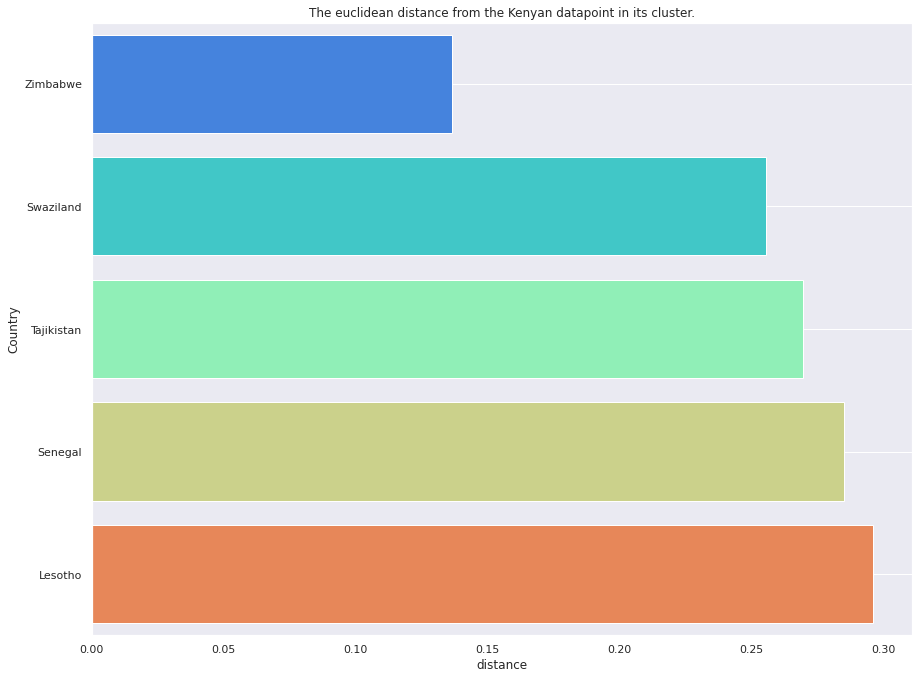

<Figure size 72x72 with 0 Axes>

In [ ]:
###A distanve barplot showing the closeness of the countries to Kenya
sns.barplot("distance","Country",data=df_same_cluster[1:6].reset_index(),palette="rainbow",estimator=np.max)
plt.grid(None)
plt.title("The euclidean distance from the Kenyan datapoint in its cluster.")
plt.xlabel("distance")
plt.figure(figsize=(1,1))
plt.clf()

In [ ]:
similar_countries=["Kenya","Senegal","Tajikistan","Swaziland","Lesotho","Zimbabwe"]
df_filtered = df2[df2['Country'].isin(similar_countries)]

In [ ]:
df_filtered 

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
107,Kenya,SUB-SAHARAN AFRICA,34707817,582650,59.6,0.09,-0.10,61.47,1000.0,85.1,8.1,8.08,0.98,90.94,1.5,39.72,14.02,0.163,0.188,0.651
116,Lesotho,SUB-SAHARAN AFRICA,2022331,30355,66.6,0.00,-0.74,84.23,3000.0,84.8,23.7,10.87,0.13,89.00,3.0,24.75,28.71,0.163,0.443,0.394
180,Senegal,SUB-SAHARAN AFRICA,11987121,196190,61.1,0.27,0.20,55.51,1600.0,40.2,22.2,12.78,0.21,87.01,2.0,32.78,9.42,0.172,0.209,0.619
194,Swaziland,SUB-SAHARAN AFRICA,1136334,17363,65.5,0.00,0.00,69.27,4900.0,81.6,30.8,10.35,0.70,88.95,2.5,27.41,29.74,0.119,0.515,0.366
199,Tajikistan,C.W. OF IND. STATES,7320815,143100,51.2,0.00,-2.86,110.76,1000.0,99.4,33.5,6.61,0.92,92.47,2.0,32.65,8.25,0.234,0.286,0.480
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [ ]:
len(df_filtered.columns)

20

In [ ]:
df_filtered2=df_filtered.drop(["Region","Population"],axis=1)

In [ ]:
###Creating subplots of different countries to guage their similarities
features=[]
features.append(df_filtered2.drop("Country",axis=1).columns)

In [ ]:
features

[Index(['Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
        'Coastline (coast/area ratio)', 'Net migration',
        'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
        'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
        'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
        'Industry', 'Service'],
       dtype='object')]

In [ ]:
df_filtered3=df_filtered2.get(['Literacy (%)','GDP ($ per capita)','Birthrate','Infant mortality (per 1000 births)',
                               'Pop. Density (per sq. mi.)'])

<Figure size 1650x1350 with 0 Axes>

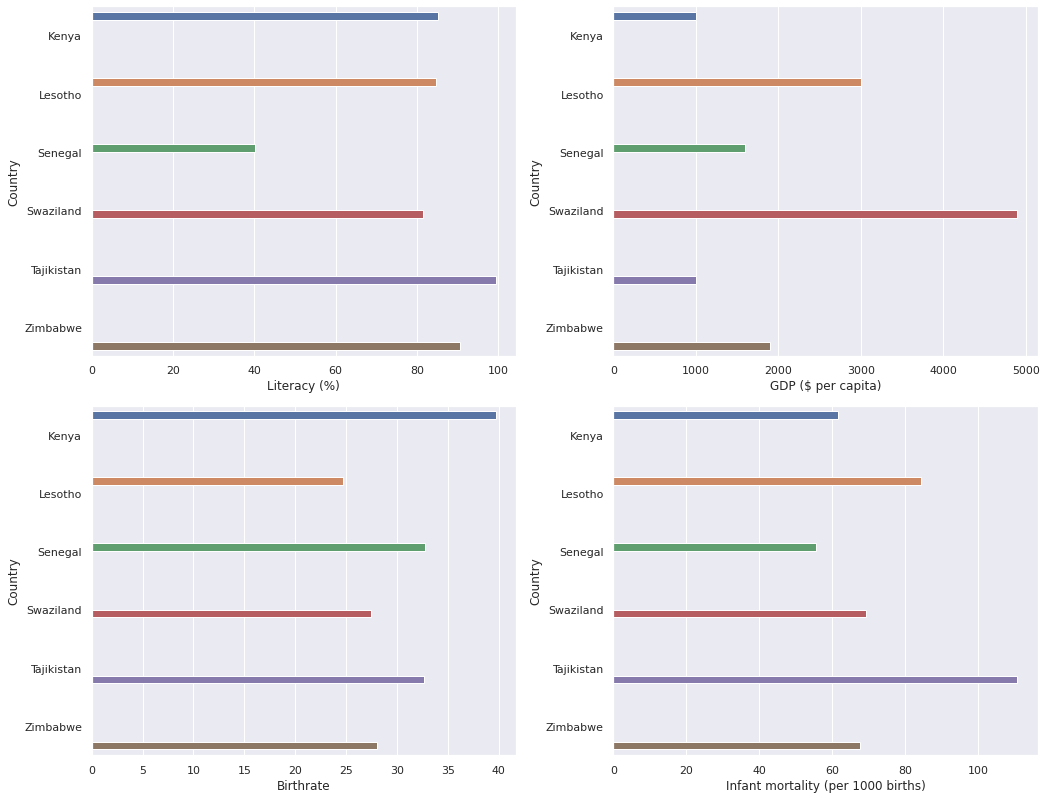

In [ ]:
###Selecting the float datatypes and creating a list of them
df_figures_columns=list(df_filtered3.select_dtypes("float64").columns)
###Creating a subplots of different countries and the data that defines them
plt.figure(figsize=(11,9),dpi=150)
plt.subplots_adjust(hspace=0.7)
fig,axes=plt.subplots(2,2)
for col,ax in zip(df_figures_columns,axes.ravel()):
  sns.barplot(x=col,y="Country",ax=ax,data=df_filtered2,hue="Country",errwidth=9.5)
  ax.legend_.remove()
  plt.tight_layout() 


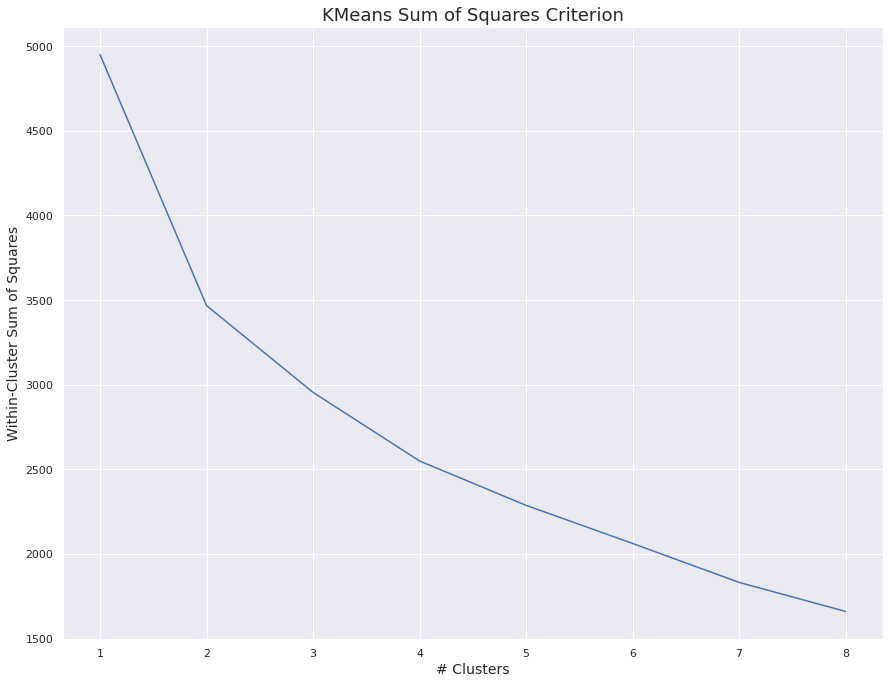

In [ ]:
###Using the silhouette distance for checking for the number of clusters with the highest silhouette score
all_kmeans = [KMeans(n_clusters=i+1,max_iter=10000,algorithm='full') for i in range(9)]
# i-th kmeans fits i+1 clusters
for i in range(9):
    all_kmeans[i].fit(pca_df)

inertias = [all_kmeans[i].inertia_ for i in range(8)]
plt.plot(np.arange(1,9),inertias)
plt.title("KMeans Sum of Squares Criterion",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Within-Cluster Sum of Squares",size=14)
plt.show() 

In [ ]:
n_clusters=9,random_state=101,max_iter=10000,algorithm='full'


In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style import rcmod
from yellowbrick.style.colors import resolve_colors

# Ignore the warning that will pop up when we do rcmod.reset_orig()
import warnings
warnings.simplefilter(action='ignore', category=plt.cbook.MatplotlibDeprecationWarning)
# Yellowbrick changes the plotting settings, reset to default here

rcmod.reset_orig()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


AttributeError: ignored

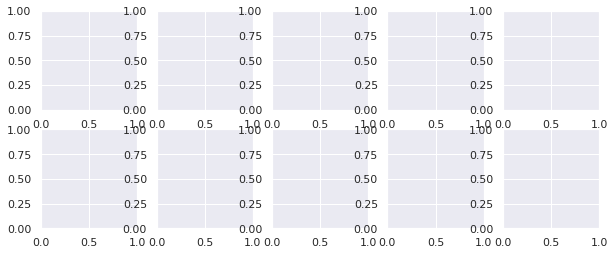

In [ ]:
visualizers = [SilhouetteVisualizer(all_kmeans[i], colors='yellowbrick',is_fitted=True) for i in range(1,9)]
for i in range(9):
    fig, (ax1, ax2) = plt.subplots(2, 5,figsize=(10,4))
    visualizer = SilhouetteVisualizer(all_kmeans[i+1], colors='yellowbrick',is_fitted=True,ax=ax1)
    visualizer.fit(pca_df)
    
    colors = np.array(resolve_colors(i+2,"yellowbrick"))
    ax2.scatter(pca_df[:,0],pca_df[:,1],c=colors[all_kmeans[i+1].labels_])
    ax2.axis("equal")
    
    # If we want to set axes to be the same for all plots, need to do something like this
    # instead of visualizer.show(), which resets the axes
    visualizer.finalize()
    ax1.set_xlim((-.4,.8))
    plt.show()

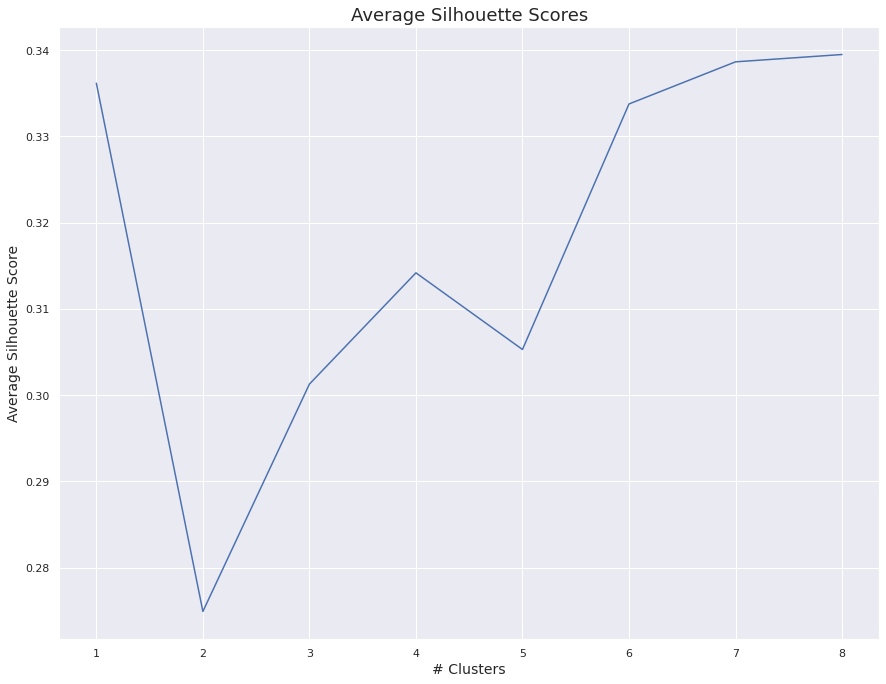

In [ ]:
# Silhouette score undefined for 1 class. i-th entry of avg_silhouette score is score for i+2 clusters.
avg_silhouette_scores = [silhouette_score(pca_df,all_kmeans[i].labels_) for i in range(1,9)]
plt.plot(np.arange(1,9),avg_silhouette_scores)
plt.title("Average Silhouette Scores",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Average Silhouette Score",size=14)
plt.show()